In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
pima = pd.read_csv("/content/corona_dataset.csv", header=None, names=['test_date','cough','fever','sore_throat','shortness_of_breath','head_ache','corona_result','age_60_and_above','gender','test_indication'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pima=pima.drop(0)

In [ ]:
pima=pima.drop(columns=['test_date','test_indication'])

In [ ]:
df = pd.get_dummies(pima, columns = ['age_60_and_above','gender'])

In [ ]:
df =df.drop(df.index[df['cough'] == 'None'])
df =df.drop(df.index[df['fever'] == 'None'])
df =df.drop(df.index[df['sore_throat'] == 'None'])
df =df.drop(df.index[df['shortness_of_breath'] == 'None'])
df =df.drop(df.index[df['head_ache'] == 'None'])
df =df.drop(df.index[df['corona_result'] == 'None'])

In [ ]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above_No,age_60_and_above_None,age_60_and_above_Yes,gender_None,gender_female,gender_male
1,0,0,0,0,0,negative,0,1,0,0,1,0
2,1,0,0,0,0,negative,0,1,0,0,1,0
3,0,1,0,0,0,negative,0,1,0,0,0,1
4,1,0,0,0,0,negative,0,1,0,0,1,0
5,1,0,0,0,0,negative,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
278844,0,0,0,0,0,negative,0,1,0,1,0,0
278845,0,0,0,0,0,negative,0,1,0,1,0,0
278846,0,0,0,0,0,positive,0,1,0,1,0,0
278847,0,0,0,0,0,other,0,1,0,1,0,0


In [ ]:
df = df.drop(df.index[df['corona_result'] == 'other'])

In [ ]:
df['corona_result'] = df['corona_result'].replace(['negative'],0)
df['corona_result'] = df['corona_result'].replace(['positive'],1)

In [ ]:
#split dataset in features and target variable
feature_cols = ['cough', 'fever', 'sore_throat',	'shortness_of_breath',	'head_ache',	'age_60_and_above_No',	'age_60_and_above_None',	'age_60_and_above_Yes',	'gender_None',	'gender_female',	'gender_male']
X = df[feature_cols] # Features
y = df.corona_result # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9572265838298285


In [ ]:
!pip install graphviz
!pip install pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


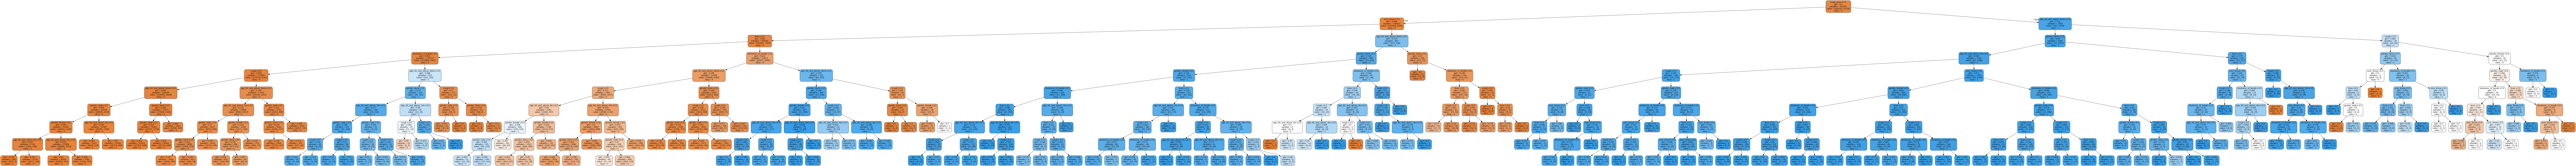

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Corona.png')
Image(graph.create_png())


In [ ]:
0test = []
test.append(input ("Is there a cough ? Enter number 0 or 1 :")) 
test.append(input ("Is there a fever ? Enter number 0 or 1 :"))
test.append(input ("Is there a sore_throat ? Enter number 0 or 1 :"))
test.append(input ("Is there a shortness_of_breath ? Enter number 0 or 1 :"))
test.append(input ("Is there a head_ache ? Enter number 0 or 1 :"))
test.append(input ("Are you older than 60 ? Enter number 0 or 1 :"))
test.append(input ("You don't wish to answer your age ? Enter number 0 or 1 :"))
test.append(input ("Are you older than 60 ? Enter number 0 or 1 :"))
test.append(input ("What's your sex ? you don't wish to answer? Enter number 0 or 1 :"))
test.append(input ("Are you a woman ? Enter number 0 or 1 :"))
test.append(input ("Are you a man ? Enter number 0 or 1 :"))

Is there a cough ? Enter number 0 or 1 :1
Is there a fever ? Enter number 0 or 1 :1
Is there a sore_throat ? Enter number 0 or 1 :1
Is there a shortness_of_breath ? Enter number 0 or 1 :1
Is there a head_ache ? Enter number 0 or 1 :0
Are you older than 60 ? Enter number 0 or 1 :1
You don't wish to answer your age ? Enter number 0 or 1 :0
Are you older than 60 ? Enter number 0 or 1 :0
What's your sex ? you don't wish to answer? Enter number 0 or 1 :0
Are you a woman ? Enter number 0 or 1 :1
Are you a man ? Enter number 0 or 1 :0


In [ ]:
df_new_row = pd.DataFrame(data=test)

In [ ]:
df_t = df_new_row.T

In [ ]:
df_t

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,1,1,0,1,0,0,0,1,0


In [ ]:
y = clf.predict(df_t)
if y==0:
  print('you don''t have Corona, you may have Malariya')
else:
  print('you have  corona')

you have a corona
